In [17]:
import pandas as pd

train = pd.read_csv('UNSW_NB15_training-set.csv')
test = pd.read_csv('UNSW_NB15_testing-set.csv')

train

train.drop(['id', 'attack_cat'], axis = 1, inplace= True)
test.drop(['id', 'attack_cat'], axis = 1, inplace= True)

print(train.columns.values)
train

X = train.drop('label', axis = 1)
y = train['label']
X.proto = pd.Categorical(pd.factorize(X.proto)[0] + 1)
X.service = pd.Categorical(pd.factorize(X.service)[0] + 1)
X.state = pd.Categorical(pd.factorize(X.state)[0] + 1)
#X = pd.get_dummies(X, columns = ['proto', 'service', 'state'], drop_first = True)
X.info
display(X.dtypes)
#display(X.proto)
#X.iloc[:,:39]
num_features = X.select_dtypes(exclude=['category']).columns.values
display(num_features)
cat_features = X.select_dtypes(include=['category']).columns.values
display(cat_features)

X_t = test.drop('label', axis = 1)
y_t = test['label']
#X_t = pd.get_dummies(X_t, columns = ['proto', 'service', 'state'], drop_first = True)
X_t.proto = pd.Categorical(pd.factorize(X_t.proto)[0] + 1)
X_t.service = pd.Categorical(pd.factorize(X_t.service)[0] + 1)
X_t.state = pd.Categorical(pd.factorize(X_t.state)[0] + 1)
X_t.info
display(X_t.dtypes)
X_t.iloc[:,:39]
test_num_features = X_t.select_dtypes(exclude=['category']).columns.values
#display(test_num_features)
test_cat_features = X_t.select_dtypes(include=['category']).columns.values
display(test_cat_features)

['dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes' 'rate'
 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt' 'sjit'
 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat' 'smean'
 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src' 'ct_state_ttl'
 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm' 'ct_dst_src_ltm'
 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd' 'ct_src_ltm' 'ct_srv_dst'
 'is_sm_ips_ports' 'label']


dur                   float64
proto                category
service              category
state                category
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
rate                  float64
sttl                    int64
dttl                    int64
sload                 float64
dload                 float64
sloss                   int64
dloss                   int64
sinpkt                float64
dinpkt                float64
sjit                  float64
djit                  float64
swin                    int64
stcpb                   int64
dtcpb                   int64
dwin                    int64
tcprtt                float64
synack                float64
ackdat                float64
smean                   int64
dmean                   int64
trans_depth             int64
response_body_len       int64
ct_srv_src              int64
ct_state_ttl            int64
ct_dst_ltm              int64
ct_src_dpo

array(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'], dtype=object)

array(['proto', 'service', 'state'], dtype=object)

dur                   float64
proto                category
service              category
state                category
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
rate                  float64
sttl                    int64
dttl                    int64
sload                 float64
dload                 float64
sloss                   int64
dloss                   int64
sinpkt                float64
dinpkt                float64
sjit                  float64
djit                  float64
swin                    int64
stcpb                   int64
dtcpb                   int64
dwin                    int64
tcprtt                float64
synack                float64
ackdat                float64
smean                   int64
dmean                   int64
trans_depth             int64
response_body_len       int64
ct_srv_src              int64
ct_state_ttl            int64
ct_dst_ltm              int64
ct_src_dpo

array(['proto', 'service', 'state'], dtype=object)

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier

#numeric_features = ["dur", "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss", "sload", "dload", "spkts", "dpkts", "swin", "dwin", "stcpb", "dtcpb", "trans_depth", "sjit", "djit", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]
numeric_features = num_features
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

#categorical_features = ["proto", "state", "service"]
categorical_features = cat_features
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

lr_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter = 2000))] #incresed max_iter, default 100 wasn't enough
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr_pl.fit(X_train, y_train)
print("Logistic Regression model score: %.3f" % lr_pl.score(X_test, y_test))
print("Logistic Regression model test score: %.3f" % lr_pl.score(X_t, y_t))

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
svc_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearSVC(max_iter = 1000))] #increased max_iter, default 1000 wasn't enough, neither was 2000, nor 4000, nor 10000, and that's as far as I'm going
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svc_pl.fit(X_train, y_train)
print("SVC model score: %.3f" % svc_pl.score(X_test, y_test))
print("SVC model test score: %.3f" % svc_pl.score(X_t, y_t))

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
dtc_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DTC(random_state = 0, ccp_alpha = .000679))] #accuracy on test data drops dramatically at .0007, .0003 gives .832, 0004 gives .862
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dtc_pl.fit(X_train, y_train)
print("Decision Tree model score: %.3f" % dtc_pl.score(X_test, y_test))
print("Decision Tree model test score: %.3f" % dtc_pl.score(X_t, y_t))

sgd_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SGDClassifier())] 
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sgd_pl.fit(X_train, y_train)
print("Stochastic Gradient Descent model score: %.3f" % sgd_pl.score(X_test, y_test))
print("Stochastic Gradient Descent model test score: %.3f" % sgd_pl.score(X_t, y_t))

Logistic Regression model score: 0.935
Logistic Regression model test score: 0.798


C:\Users\aller\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC model score: 0.935
SVC model test score: 0.559
Decision Tree model score: 0.936
Decision Tree model test score: 0.859
Stochastic Gradient Descent model score: 0.933
Stochastic Gradient Descent model test score: 0.788


In [22]:
y_t.info

<bound method Series.info of 0        0
1        0
2        0
3        0
4        0
        ..
82327    0
82328    0
82329    0
82330    0
82331    0
Name: label, Length: 82332, dtype: int64>

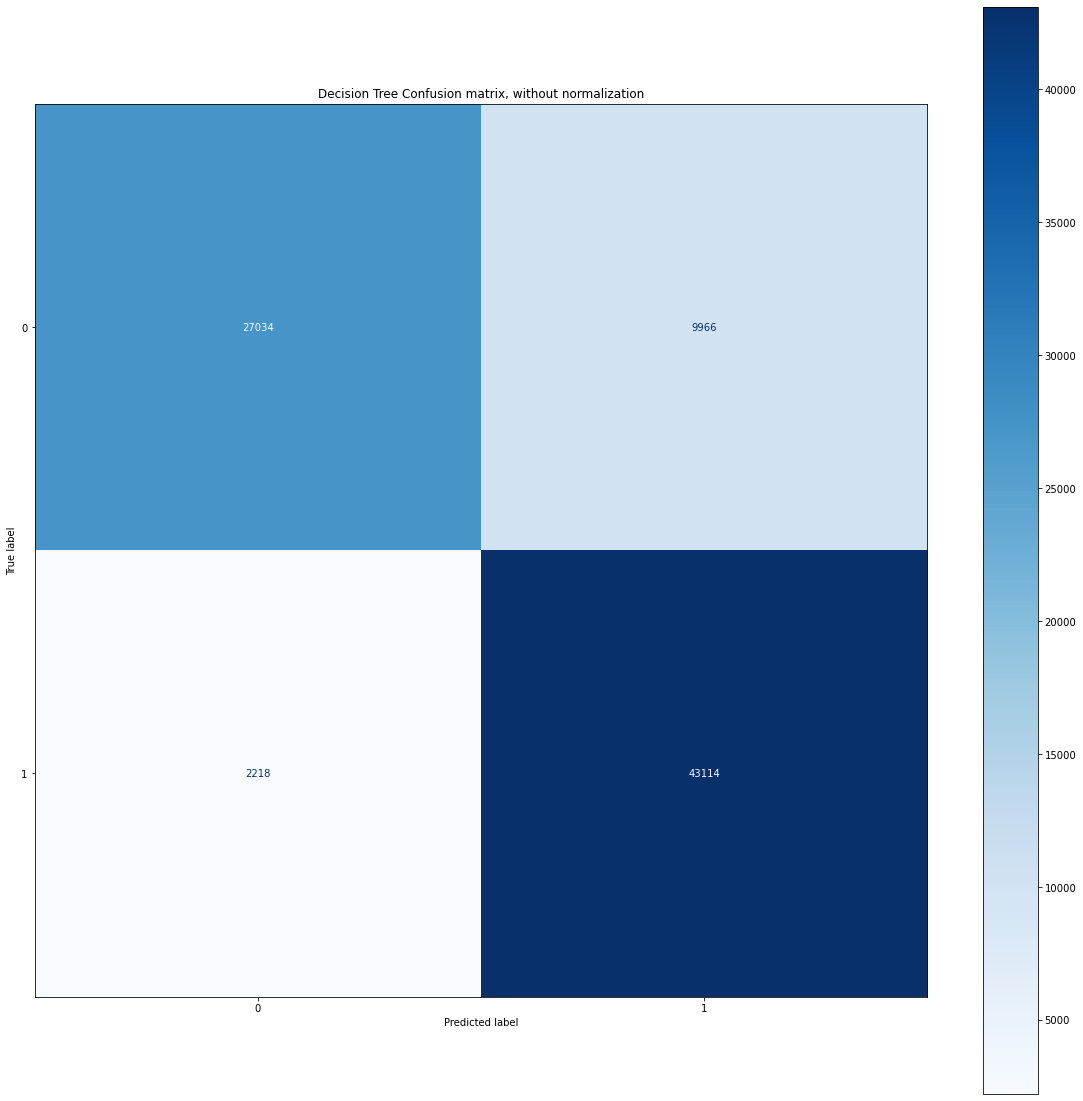

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

prediction = dtc_pl.predict(X_t)
fig, ax = plt.subplots(figsize=(20, 20))

disp = ConfusionMatrixDisplay.from_predictions(y_t, prediction, cmap=plt.cm.Blues, display_labels=dtc_pl.classes_, ax = ax)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization')
plt.show()

In [31]:
clf = DTC(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

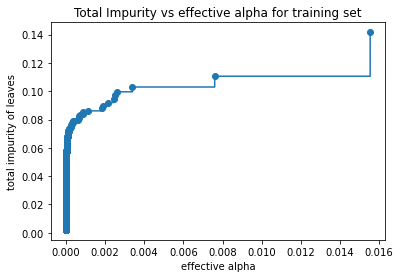

In [32]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [34]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DTC(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29284304086104024


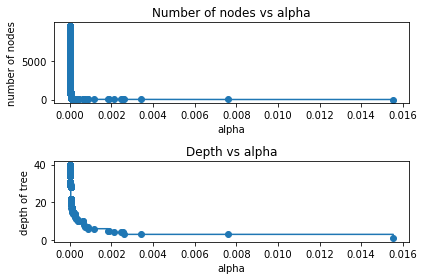

In [35]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

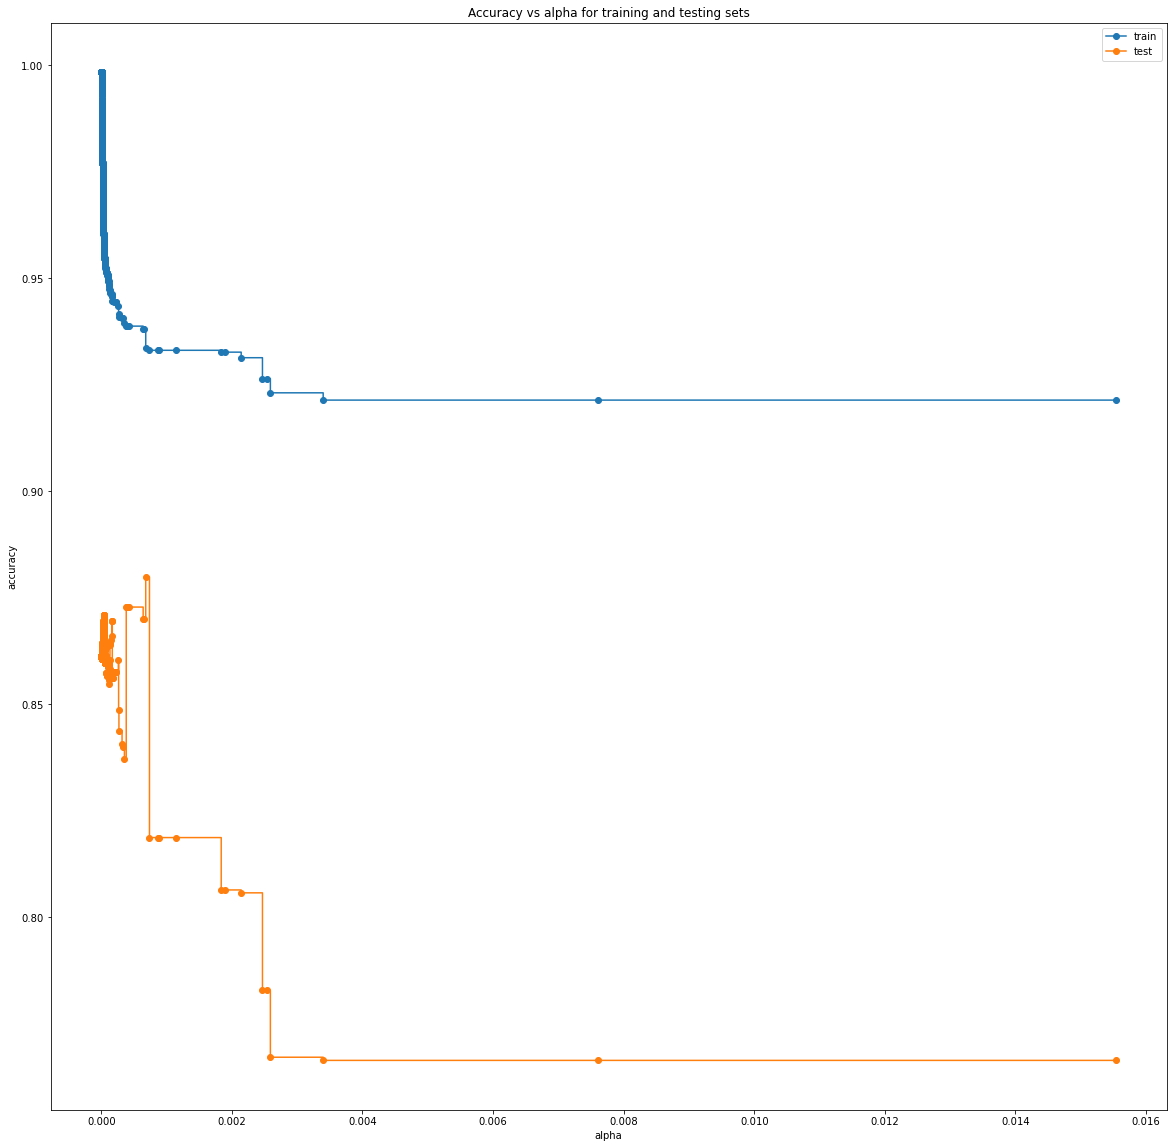

[0.00012649 0.00012762 0.00013273 0.00013912 0.00015241 0.0001565
 0.00015909 0.00015912 0.00016661 0.00016833 0.00017546 0.00018066
 0.00018983 0.00022631 0.0002301  0.00026272 0.00026518 0.00027001
 0.0003178  0.00032757 0.00035391 0.00038179 0.00039244 0.00042491
 0.00064082 0.00065119 0.00068052 0.00073777 0.00086808 0.00088909
 0.0011457  0.00183632 0.00189505 0.00214216 0.00246803 0.00253052
 0.00258925 0.00339791 0.00760131 0.01553689]
[0.8582568138755283, 0.8603580624787446, 0.8642569110430938, 0.8637953651071273, 0.8649006461643104, 0.8660059272214935, 0.8695039595782927, 0.8695039595782927, 0.8695039595782927, 0.8561677112179954, 0.8561677112179954, 0.8561677112179954, 0.8575159111888452, 0.8575159111888452, 0.8575159111888452, 0.860224457076228, 0.8486615167856969, 0.8437302628382646, 0.8404751493951319, 0.840001457513482, 0.8369892629840159, 0.8727347811300588, 0.8727347811300588, 0.8727347811300588, 0.8700019433513093, 0.8700019433513093, 0.879791575572074, 0.8186245931108

In [53]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_t, y_t) for clf in clfs]

fig, ax = plt.subplots(figsize = (20,20))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.tick_params(axis = 'both', which = 'both')
ax.legend()
plt.show()
print(ccp_alphas[-40:])
print(test_scores[-40:])

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X.shape
X_new = SelectKBest(chi2, k=42).fit(X, y)
#X_new.shape
names = X_new.get_support(1)
display(names)
X_new = X[X.columns[names]]
#X_new.get_feature_names_out()
#display(X_new)
#X_new = pd.DataFrame(X_new)
X_new
print(X_new.columns.values)
num_features =X_new.select_dtypes(exclude=['category']).columns.values
cat_features = X_new.select_dtypes(include=['category']).columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41], dtype=int64)

['dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes' 'rate'
 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt' 'sjit'
 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat' 'smean'
 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src' 'ct_state_ttl'
 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm' 'ct_dst_src_ltm'
 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd' 'ct_src_ltm' 'ct_srv_dst'
 'is_sm_ips_ports']


In [70]:
#numeric_features = ["dur", "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss", "sload", "dload", "spkts", "dpkts", "swin", "dwin", "stcpb", "dtcpb", "trans_depth", "sjit", "djit", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]
numeric_features = num_features
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

#categorical_features = ["proto", "state", "service"]
categorical_features = cat_features
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DTC())] 
)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
print("Decision Tree model test score: %.3f" % dtc_pl.score(X_t, y_t))

model score: 0.950
Decision Tree model test score: 0.859
